In [1]:
import pandas as pd
import numpy as np

In [2]:
#importando as 2 bases
base_treino = pd.read_csv("train.csv")
base_teste = pd.read_csv("test.csv")

In [3]:
#Visualizando a base
base_treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Visualizando quantidade de valores vazios por colunas em ordem decrescente
base_treino.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

In [5]:
#Mesma coisa que o de cima mas em %
base_treino.isnull().sum().sort_values(ascending=False).head(20) / len(base_treino)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Condition2      0.000000
dtype: float64

In [6]:
#Selecionando e excluindo colunas com mais de 10% de vazios
eliminar = base_treino.columns[base_treino.isnull().sum()/base_treino.shape[0] > 0.1] #Seleciona as colunas
base_treino = base_treino.drop(eliminar, axis=1) #Exclui as colunas
base_treino.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
#Mesma coisa para a base de treino
eliminar = base_teste.columns[base_teste.isnull().sum()/base_teste.shape[0] > 0.1] #Seleciona as colunas
base_teste = base_teste.drop(eliminar, axis=1) #Exclui as colunas
base_teste.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [8]:
#Selecionando colunas que são de texto, modelo não reconhece.
colunas_texto_treino = base_treino.columns[base_treino.dtypes == 'object']
colunas_texto_treino

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
#Excluindo colunas de texto
base_treino = base_treino.drop(colunas_texto_treino, axis=1)
base_treino.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
#Mesma coisa mas para base de teste
#Selecionando colunas que são de texto, modelo não reconhece.
colunas_texto_teste = base_teste.columns[base_teste.dtypes == 'object']
#Excluindo colunas de texto
base_teste = base_teste.drop(colunas_texto_teste, axis=1)
base_teste.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [11]:
#Preenchendo valores vazios restantes
base_treino = base_treino.fillna(-1)
base_teste = base_teste.fillna(-1)

In [12]:
#Definindo oque o modelo deve prever(Y) e no que ele deve se basear(X)
X_treino = base_treino.drop('SalePrice', axis=1)
Y_treino = base_treino['SalePrice']

In [13]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split
# Separando essa base em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X_treino, Y_treino, test_size=0.33, random_state=42)

In [14]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [15]:
# Criando o regressor e fazendo o fit com os dados de treino
regressao_linear = LinearRegression().fit(x_train, y_train)
y_predicao = regressao_linear.predict(x_test)

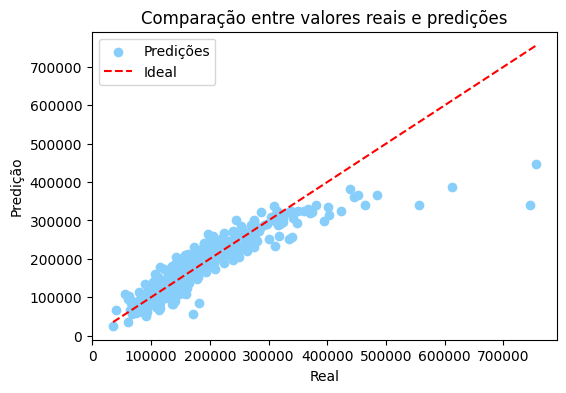

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_predicao, color='#87CEFA', alpha=1, label='Predições')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Real')
plt.ylabel('Predição')
plt.title('Comparação entre valores reais e predições')
plt.legend()
plt.show()

In [17]:
#Mostrando o erro
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print(f"Erro médio absoluto: {mean_absolute_error(y_test, y_predicao)}")
print(f"Erro médio absolute em %: {mean_absolute_percentage_error(y_test, y_predicao)*100 :.2f}%")

Erro médio absoluto: 23763.187393064567
Erro médio absolute em %: 13.57%


In [18]:
#Fazendo com a base de teste agora
regressao_linear = LinearRegression().fit(X_treino, Y_treino)
y_predicao = regressao_linear.predict(base_teste)

In [19]:
#Mostrando resultado
base_teste['SalePrice'] = y_predicao
resultado = base_teste[['Id', 'SalePrice']]
resultado.head()

,Id,SalePrice
0,1461,118558.001895
1,1462,150737.112374
2,1463,171833.608808
3,1464,199122.669281
4,1465,194257.713260
